In [1]:
import xarray
import numpy as np
import pandas
import h5py
import datetime
from ulmo.utils import image_utils
from ulmo.plotting import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

/Users/rachelstumpf/ulmo/ulmo/utils/image_utils.py:8: UserWarning: healpy not installed.  Not all functions will work!
  warnings.warn("healpy not installed.  Not all functions will work!")


In [2]:
# plot examples of DT matches
# scatterplot from table
# I guess I previously made this by adapting the metadata, but I could also just do from table

table = pandas.read_parquet('/Users/rachelstumpf/SST_L3S_VIIRS_2012.parquet')

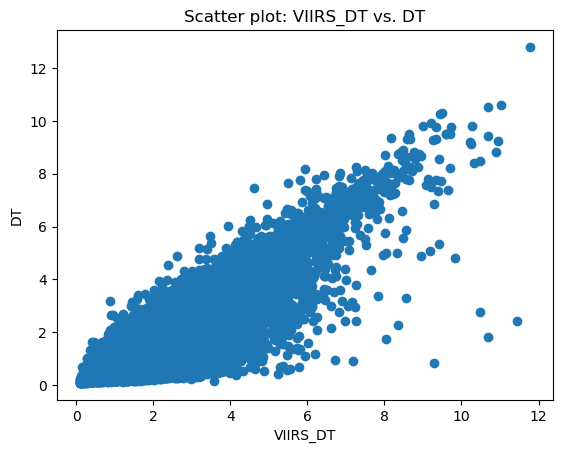

In [3]:
filtered_df = table[table['DT'] != 0]
plt.scatter(filtered_df['VIIRS_DT'], filtered_df['DT'])
plt.xlabel('VIIRS_DT')
plt.ylabel('DT')
plt.title('Scatter plot: VIIRS_DT vs. DT')
plt.show()

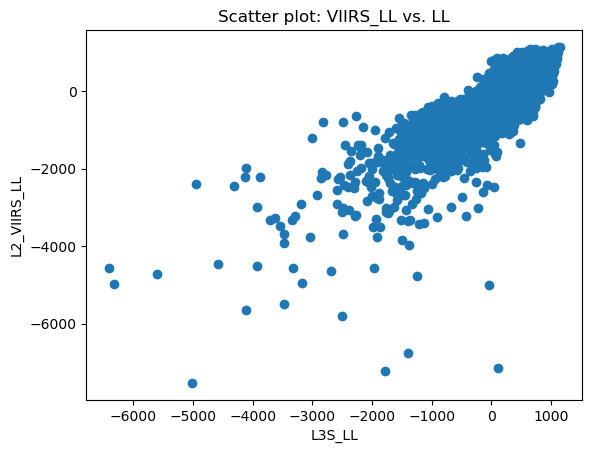

In [4]:
filtered_df = table[table['DT'] != 0]
plt.scatter(filtered_df['LL'], filtered_df['VIIRS_LL'])
plt.xlabel('L3S_LL')
plt.ylabel('L2_VIIRS_LL')
plt.title('Scatter plot: VIIRS_LL vs. LL')
plt.show()

In [7]:
filtered_df.loc[:,'diff_DT'] = filtered_df.loc[:,'VIIRS_DT'] - filtered_df.loc[:,'DT']

max_diff_DT = np.max(filtered_df.loc[:,'diff_DT'])
max_diff_DT_df = filtered_df[filtered_df['diff_DT'] == max_diff_DT]
small_diff_DT_df = filtered_df[filtered_df['VIIRS_UID'] == 13281101161369470]

In [11]:
max_diff_DT_df.columns

Index(['VIIRS_row', 'VIIRS_col', 'VIIRS_UID', 'VIIRS_LL', 'VIIRS_pp_file',
       'VIIRS_pp_idx', 'VIIRS_T90', 'VIIRS_T10', 'VIIRS_DT', 'VIIRS_pp_type',
       'VIIRS_Tmin', 'VIIRS_Tmax', 'VIIRS_clear_fraction', 'VIIRS_datetime',
       'VIIRS_filename', 'VIIRS_ex_filename', 'VIIRS_lat', 'VIIRS_lon', 'row',
       'col', 'lat', 'lon', 'datetime', 'ex_filename', 'filename', 'pp_file',
       'pp_root', 'field_size', 'pp_idx', 'pp_type', 'mean_temperature',
       'Tmin', 'Tmax', 'T90', 'T10', 'clear_fraction', 'DT', 'LL', 'diff_DT'],
      dtype='object')

In [27]:
pandas.set_option('display.max_colwidth', None)
print("VIIRS_pp_file:")
print(small_diff_DT_df.loc[:, 'VIIRS_pp_file'])

print("\nVIIRS_pp_idx:")
print(small_diff_DT_df.loc[:, 'VIIRS_pp_idx'])

print("\npp_file:")
print(small_diff_DT_df.loc[:, 'pp_file'])

print("\npp_idx:")
print(small_diff_DT_df.loc[:, 'pp_idx'])

print("\nfilename:")
print(small_diff_DT_df.loc[:, 'filename'])

VIIRS_pp_file:
1    s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5
Name: VIIRS_pp_file, dtype: object

VIIRS_pp_idx:
1    252131
Name: VIIRS_pp_idx, dtype: int64

pp_file:
1    s3://sst-l3s/PreProc/L3S_VIIRS144_2012_preproc.h5
Name: pp_file, dtype: object

pp_idx:
1    217701
Name: pp_idx, dtype: int64

filename:
1    /Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
Name: filename, dtype: object


In [5]:
# this is example with high difference in DT

pp_file = "s3://sst-l3s/PreProc/L3S_VIIRS144_2012_preproc.h5"
pp_idx = 121248

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_far_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/Desktop/PreProc/L3S_VIIRS144_2012_preproc.h5")
#L3S_far_ex = np.flipud(np.fliplr(L3S_row0))[0,...]
L3S_far_ex = L3S_far_ex[0,...]

# get matching VIIRS
pp_file = "s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5"
pp_idx = 178505 # these cannot be simply read into the function because now they start with VIIRS_ so do not match

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_far_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_far_ex = VIIRS_far_ex[0,...]

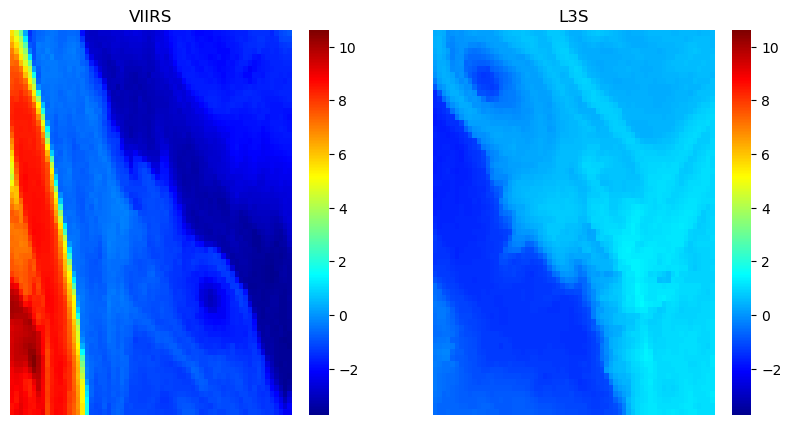

In [6]:
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_far_ex)
viirs_max = np.max(VIIRS_far_ex)
l3s_min = np.min(L3S_far_ex)
l3s_max = np.max(L3S_far_ex)

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_far_ex, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_far_ex, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

In [7]:
# this is example with low difference in DT

pp_file = "s3://sst-l3s/PreProc/L3S_VIIRS144_2012_preproc.h5"
pp_idx = 217701

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_close_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/Desktop/PreProc/L3S_VIIRS144_2012_preproc.h5")
#L3S_far_ex = np.flipud(np.fliplr(L3S_row0))[0,...]
L3S_close_ex = L3S_close_ex[0,...]

# get matching VIIRS
pp_file = "s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5"
pp_idx = 252131 # these cannot be simply read into the function because now they start with VIIRS_ so do not match

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_close_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_close_ex = VIIRS_close_ex[0,...]

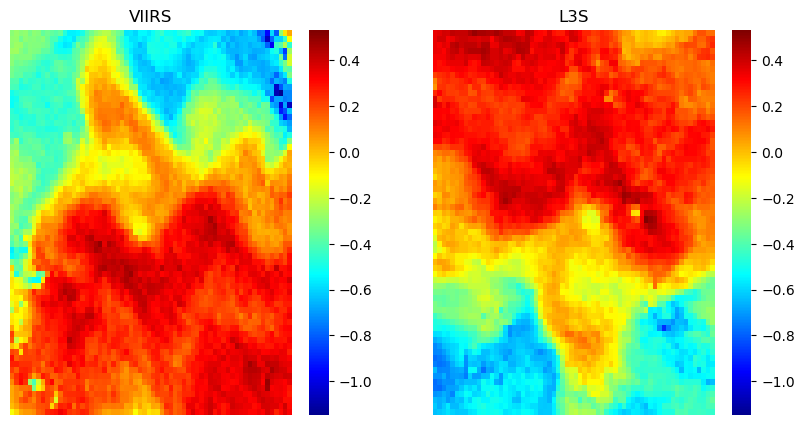

In [8]:
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_close_ex)
viirs_max = np.max(VIIRS_close_ex)
l3s_min = np.min(L3S_close_ex)
l3s_max = np.max(L3S_close_ex)

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_close_ex, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_close_ex, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()